<a href="https://colab.research.google.com/github/sugatoray/CodeSnippets/blob/master/TimeSeries_Analysis_with_FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prophet

Source: https://facebook.github.io/prophet/docs/quick_start.html

This is a simple copy of the example available at the [source](https://facebook.github.io/prophet/docs/quick_start.html) mentioned above. 

In [0]:
import pandas as pd
from fbprophet import Prophet


In [0]:
data_file = "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv"

In [3]:
df = pd.read_csv(data_file)
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [5]:
# Make Prophet model
m = Prophet(daily_seasonality=False) # prophet model
m.fit(df)

In [6]:
# Predict future
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [7]:
# Making out-of-samle fit with future-dates
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.199274    7.416080    8.905296
3266 2017-01-16  8.524244    7.829457    9.223547
3267 2017-01-17  8.311615    7.569034    9.021472
3268 2017-01-18  8.144232    7.448506    8.907198
3269 2017-01-19  8.156091    7.374218    8.921238

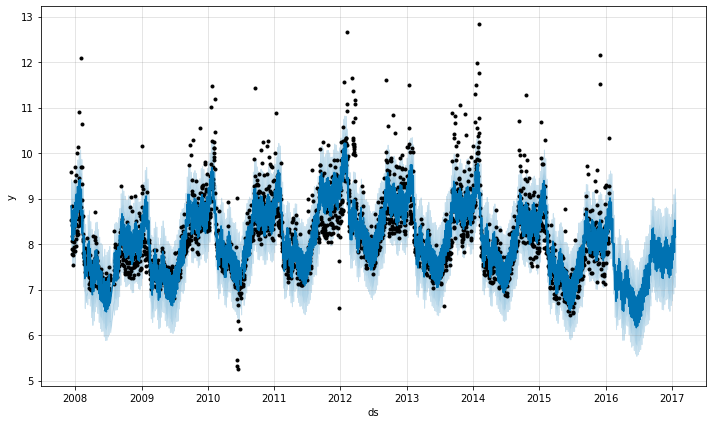

In [8]:
# Plot forecast
fig1 = m.plot(forecast)

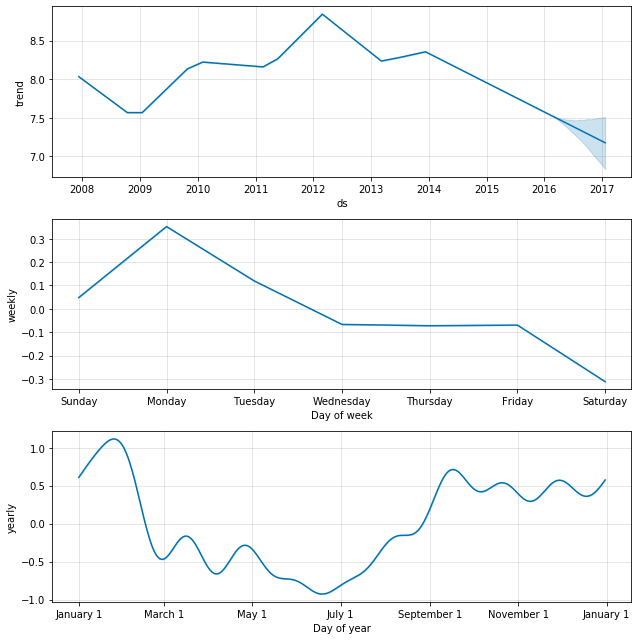

In [9]:
# Show Components of the Forecast
fig2 = m.plot_components(forecast)

In [10]:
# Make plots with plotly library
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)